## Plot images 

In [2]:
from cv2 import imread
from matplotlib import pyplot as plt

In [3]:
img = imread(
    "/Users/schalappe/Documents/Lab/Engineer/Projects/kenyan_sign_language_classification/data/Images/ImageID_0BGG3W3J.jpg"
)

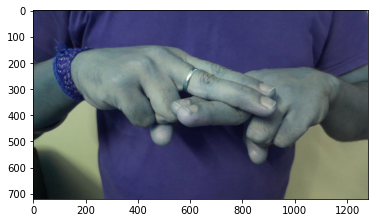

In [4]:
plt.imshow(img)
plt.show()

## EDA

In [5]:
from pandas import read_csv

In [6]:
train = read_csv(
    "/Users/schalappe/Documents/Lab/Engineer/Projects/kenyan_sign_language_classification/data/Train.csv",
    header="infer"
)

In [7]:
train.head()

,img_IDS,Label
0,ImageID_33HMDMJ3,Temple
1,ImageID_V5POEX4O,Church
2,ImageID_89CCCCW6,Enough/Satisfied
3,ImageID_GNJXOWX5,Me
4,ImageID_7Q9LOP7R,Love


<AxesSubplot:>

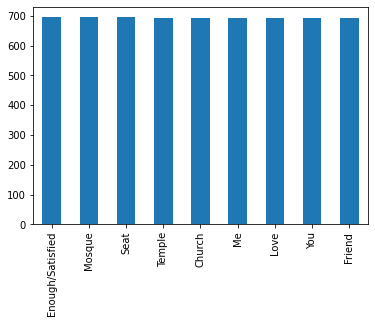

In [8]:
train["Label"].value_counts().plot.bar()

## Dataset

In [1]:
import tensorflow as tf

### TFRecord

In [2]:
from src.data import prepare_from_tfrecord

In [12]:
dataset = prepare_from_tfrecord(
    "/Users/schalappe/Documents/Lab/Engineer/Projects/kenyan_sign_language_classification/data/features/Test.tfrecords",
    batch=1, train=True
)

Metal device set to: Apple M1 Pro


2022-02-08 07:47:41.271657: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-08 07:47:41.272212: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 9), dtype=float32)


2022-02-08 07:48:03.745282: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-02-08 07:48:03.745318: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


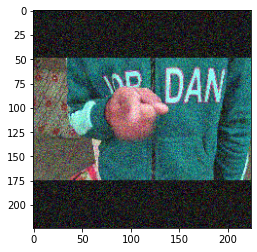

In [14]:
for features, label in dataset.take(1):
    plt.imshow(features[0])
    print(label)

plt.show()

In [ ]:
from src.data import split_and_load_data, load_dataset_from_generator, KenyanGenerator

In [ ]:
_, x_val, _, y_val = split_and_load_data()

In [ ]:
type(y_val[0])

In [ ]:
y_val[0]

In [ ]:
print(f"Taille chemins: {len(x_val)}")
print(f"Taille chemins: {len(x_val)}")

### Generator

In [ ]:
data_generator = KenyanGenerator(data=x_val, labels=y_val, binarize=True, classes=9)
DS = iter(data_generator.generator())

In [ ]:
path, label = next(DS)
print(f"Label: {label}")

### Set

In [ ]:
data_set = load_dataset_from_generator(
    generator=data_generator, batch=32, shape=224, train=True
)

In [ ]:
image, label = next(iter(data_set))

In [ ]:
image.shape

In [ ]:
label[4]

In [ ]:
plt.imshow(image[4])
plt.show()

In [ ]:
plt.imshow(image[1])
plt.show()